# ANN & Fashion MNIST

<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data 반복실행 해보자

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 4 Coat


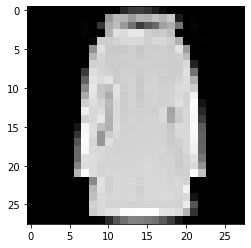

In [2]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = np.random.randint(0, 59999)
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index], cmap='gray')

In [3]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


##  코딩 task!

1. 전처리
    * x : sc_____
    * y : _______ encoding

2. 모델링
    * model에 모델 선언
    * Input layer에 어떻게 전달할 것인지 고민 필요
    * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
    * 히든레이어는 최소 3개를 쓸 것!
    * 노드 수는 512개를 기본으로 시작
    * 자유롭게 바꿔가며 성능을 볼 것

3. 학습
    * epochs=50, validation_split=0.2
    * early stopping

In [4]:
#############
# Your Code #
#############
max_n, min_n = x_train.max(), x_train.min()
max_n, min_n

(255, 0)

In [5]:
# min-max scaling

x_train = (x_train - min_n) / (max_n - min_n)
x_test = (x_test - min_n) / (max_n - min_n)

In [6]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [7]:
#############
# Your Code # : One-hot encoding
#############
from tensorflow.keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [10]:
class_n = len(set(y_train))

In [11]:
y_train = to_categorical(y_train, class_n)
y_test = to_categorical(y_test, class_n)

In [12]:
y_train.shape

(60000, 10)

In [13]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
#############
# Your Code # : Sequential API
#############
# 1. 세션 클리어
clear_session()

# 2. 모델 선언 : 시퀀셜하게!
model = Sequential()

# 3. 모델 조립 : 레이어 블록을 차곡차곡!
model.add( Input(shape=(x_train.shape[1], x_train.shape[2])) )
model.add( Flatten() )
model.add( Dense(512, activation=relu) )
model.add( Dense(512, activation=relu) )
model.add( Dense(256, activation=relu) )
model.add( Dense(256, activation=relu) )
model.add( Dense(64, activation=relu) )
model.add( Dense(10, activation=softmax) )

# 4. 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam() )

# 써머리
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 10)                6

In [18]:
#############
# Your Code # : Functional API
#############
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기
il = Input(shape=(28,28) )
fl = Flatten()(il)
hl = Dense(512, activation=relu)(fl)
hl = Dense(512, activation=relu)(hl)
hl = Dense(256, activation=relu)(hl)
hl = Dense(256, activation=relu)(hl)
hl = Dense(64, activation=relu)(hl)
ol = Dense(10, activation=softmax)(hl)

# 3. 모델의 시작과 끝 지정
model = Model(il, ol)

# 4. 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam() )

# 써머리
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)                16448 

In [16]:
#############
# Your Code # Early Stopping
#############
# epochs=50, validation_split=0.2
# early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
es = EarlyStopping(monitor='val_loss',         # 관측 대상
                   min_delta=0,                # 이 값 이상으로 관측 대상 값이 변해야 개선 인정
                   patience=5,                 # 개선되지 않을 때 몇 번까지 참을래
                   verbose=1,                 
                   restore_best_weights=True)  # 최적의 가중치 값을 모델에 전달

In [19]:
model.fit(x_train, y_train, epochs=50, verbose=1,
          validation_split=0.2, callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5250 - accuracy: 0.8104 - val_loss: 0.4753 - val_accuracy: 0.8307
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3951 - accuracy: 0.8564 - val_loss: 0.4167 - val_accuracy: 0.8516
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3527 - accuracy: 0.8712 - val_loss: 0.4018 - val_accuracy: 0.8615
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3266 - accuracy: 0.8818 - val_loss: 0.3413 - val_accuracy: 0.8808
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3056 - accuracy: 0.8889 - val_loss: 0.3607 - val_accuracy: 0.8727
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2903 - accuracy: 0.8931 - val_loss: 0.3352 - val_accuracy: 0.8767
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2764 - accuracy: 0.8973 - val_loss: 0.3423 - val_accuracy:

## Visualize prediction

위에서 지키라고 한 사항들 안지키면 동작을 안할껄...?

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test).argmax(axis=1)


 Test accuracy: 0.883400022983551


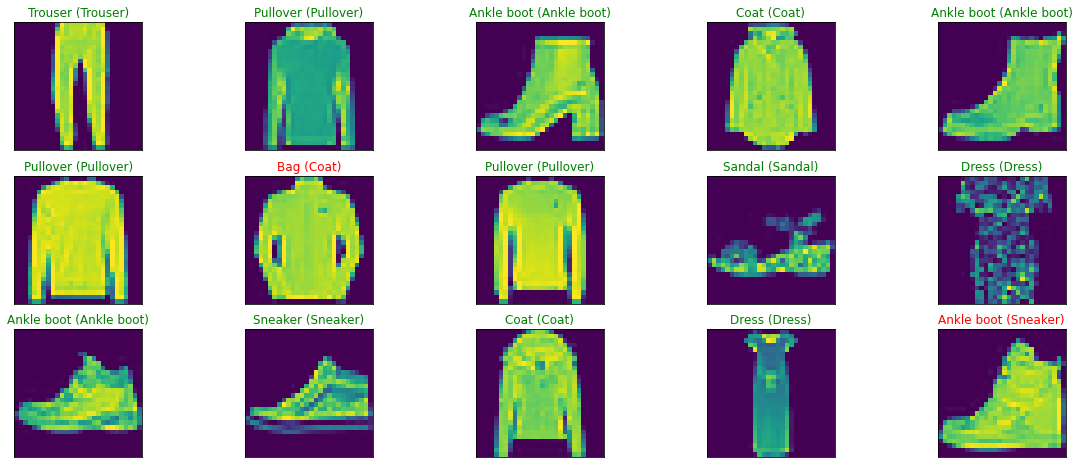

In [23]:
####### 반복실행해보자

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index].reshape([28,-1]) ) )
    predict_index = y_hat[index]
    true_index = y_test[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))